L'installation [Elasticité dynamique](https://github.com/laurentperrinet/elasticite) agit comme un filtre et génère de nouveaux espaces démultipliés, comme un empilement quasi infini d'horizons. Par principe de réflexion, la pièce absorbe l'image de l'environnement et accumule les points de vue ; le mouvement permanent requalifie continuellement ce qui est regardé et entendu. 

Ce post étudie commment sampler des points sur la structure.

<!-- TEASER_END -->

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [26]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [27]:
e.lames.shape

(4, 31)

## sampling particles on the structure

In [28]:
struct = e.lames[:3, -e.struct_N:]
N_particles = e.struct_N * 2**8
particles = np.ones((5, N_particles))
for i, vec in enumerate(struct.T.tolist()):
    print(i, vec)
    N_particles_ = N_particles/e.struct_N
    x0, x1 = vec[0] - .5*e.struct_longueur*np.cos(vec[2]), vec[0] + .5*e.struct_longueur*np.cos(vec[2])
    y0, y1 = vec[1] - .5*e.struct_longueur*np.sin(vec[2]), vec[1] + .5*e.struct_longueur*np.sin(vec[2])
    particles[0, i*N_particles_:(i+1)*N_particles_] = np.linspace(x0, x1, N_particles_)
    particles[1, i*N_particles_:(i+1)*N_particles_] = np.linspace(y0, y1, N_particles_)
    

0 [-1.4488887394336025, 3.111771432346219, 3.4033920413889427]
1 [-3.5317048714782544, 1.364081184137463, 4.276056667386108]
2 [-3.853764727862665, -1.4626018975182205, 4.921828490624009]
3 [1.4488887394336025, 3.111771432346219, -0.2617993877991494]
4 [3.5317048714782544, 1.364081184137463, -1.1344640137963142]
5 [3.853764727862665, -1.4626018975182205, -1.780235837034216]


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [29]:
particles

array([[ 0.  , -0.01, -0.02, ...,  3.55,  3.54,  3.54],
       [ 3.5 ,  3.5 ,  3.49, ..., -2.91, -2.92, -2.93],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]])

In [30]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

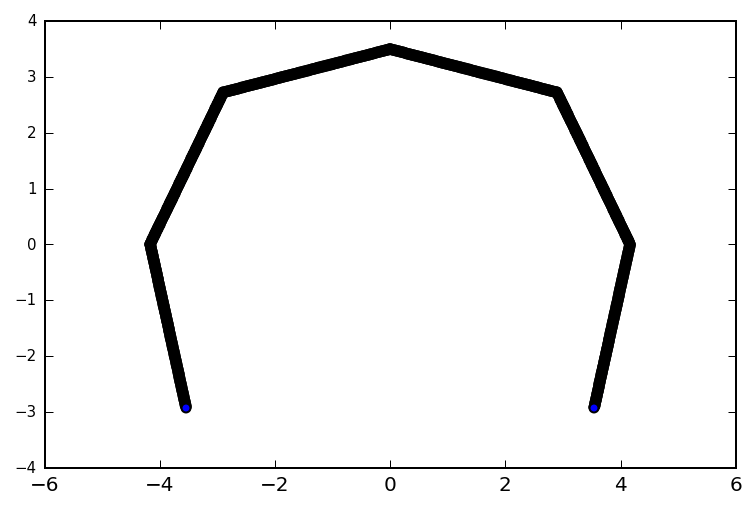

In [31]:
plt.scatter(particles[0,:], particles[1,:])

In [32]:
import MotionParticles as mp


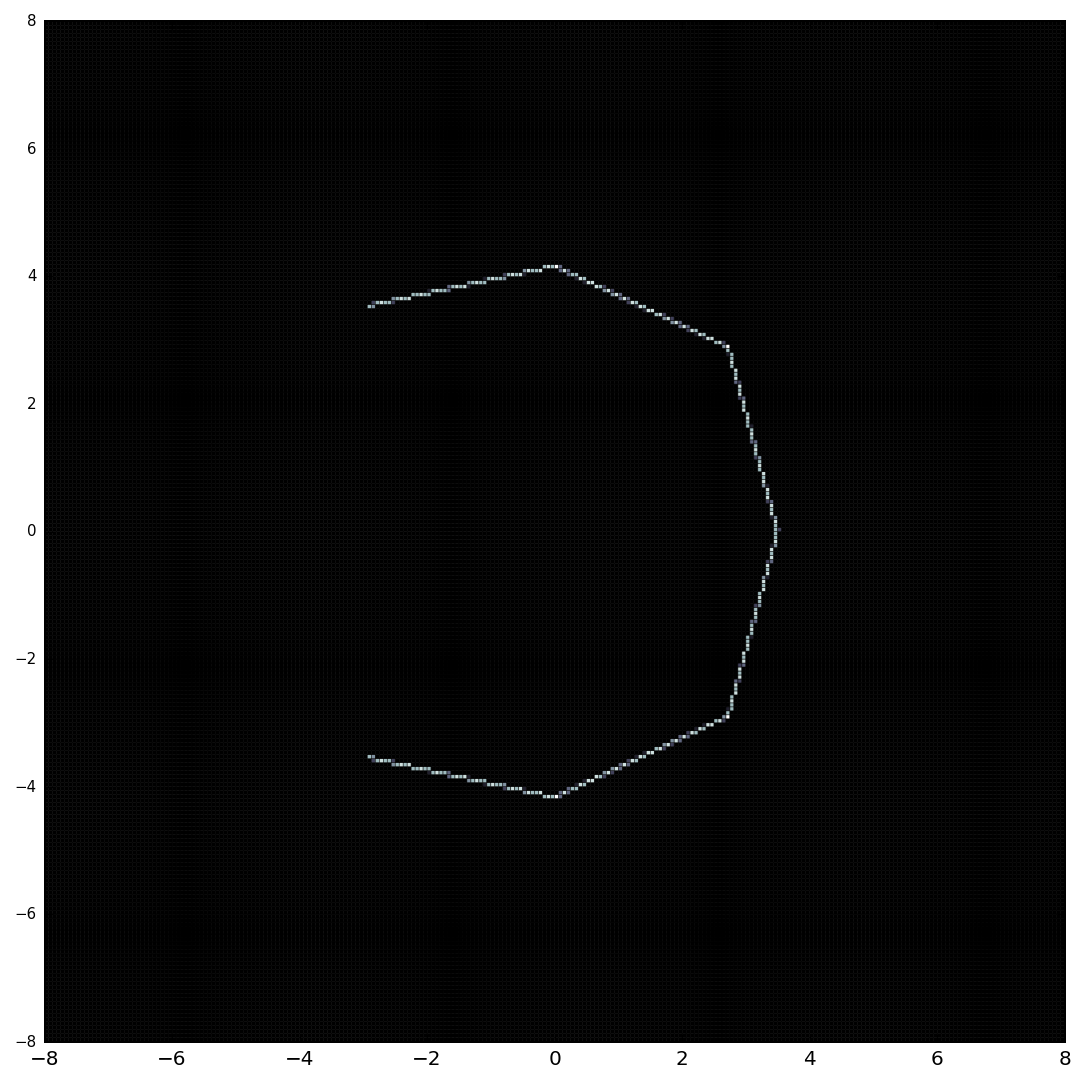

In [33]:
fig, ax = mp.spatial_readout(particles, N_X=256, N_Y=256, N_quant_x=256, N_quant_y=256, hue=False, width=e.total_width*2)

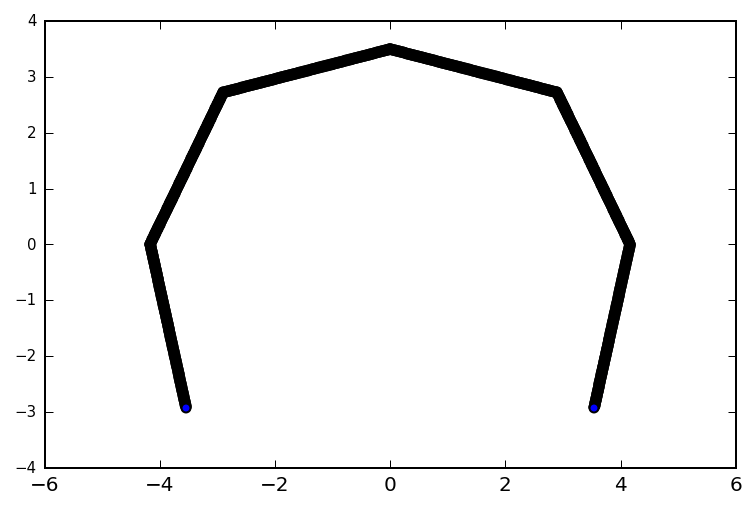

In [34]:
e.sample_structure()
plt.scatter(e.particles[0,:], e.particles[1,:])

## generating a trajectory

(-8, 8)

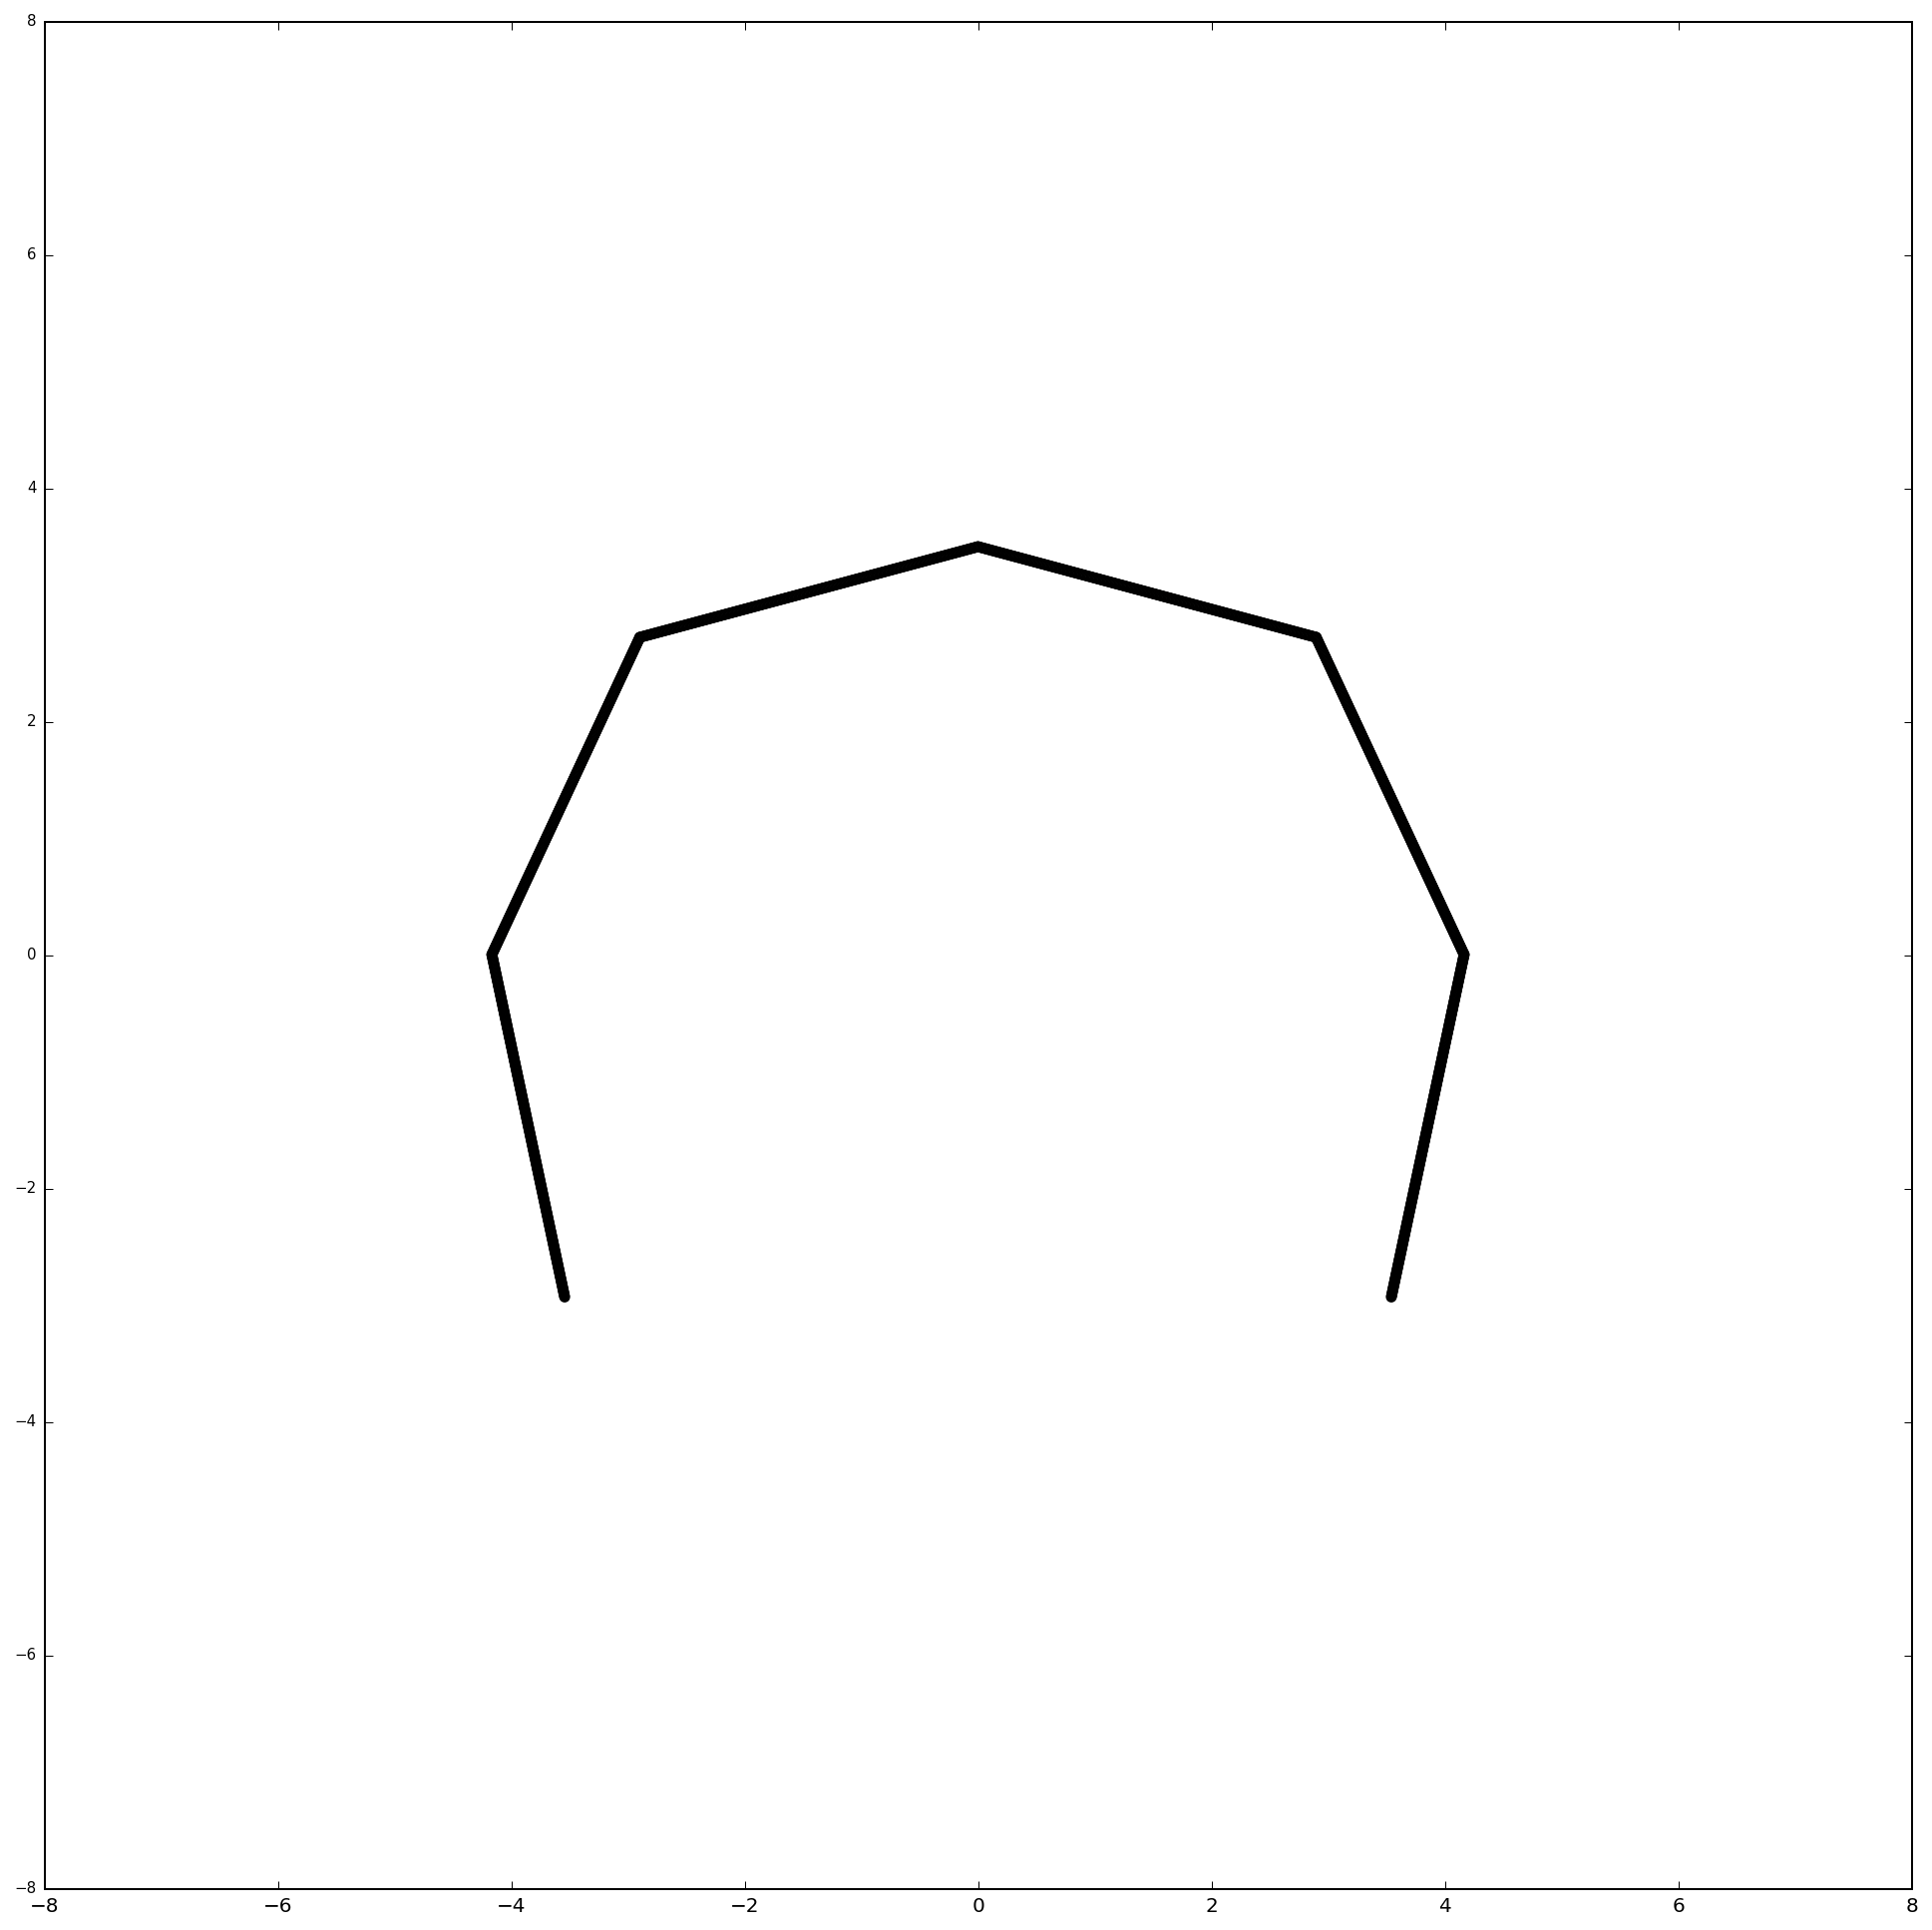

In [35]:
import elasticite as el
import numpy as np

duration = el.get_default_args(el.EdgeGrid.render)['duration']
location = el.get_default_args(el.EdgeGrid.render)['location']


class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        tf = 2. #how many cycles in one period (duration)
        force = np.zeros_like(self.lames[2, :N_lame])
        damp = lambda t: 0.01 #* np.exp(np.cos(t / 6.) / 3.**2)
        xf = lambda t: location[0] - self.total_width/4.
        zf = lambda t: location[2] * (.5 + .45 * np.sin(2*np.pi*self.t*tf/duration))
        
        desired_angle = np.pi/2 + np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t))
        self.lames[2, :N_lame] = np.mod(self.lames[2, :N_lame]-np.pi/2, np.pi) + np.pi/2
        force += np.mod(desired_angle-np.pi/2, np.pi) + np.pi/2- self.lames[2, :N_lame]
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig = plt.figure(figsize=(e.figsize, e.figsize))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[1,:])
ax.set_xlim([-e.total_width, e.total_width])
ax.set_ylim([-e.total_width, e.total_width])

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



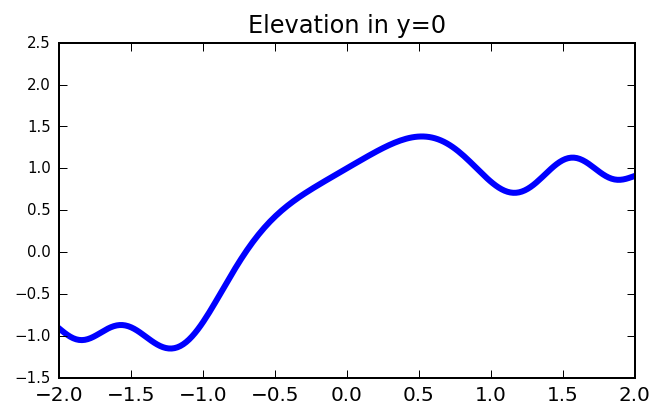

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in y=0")
ax.set_ylim(-1.5,2.5)
line, = ax.plot(xx, zz(0), lw=3)

In [37]:
fps = 25.
# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.
def make_frame_mpl(t):
    line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
animation.ipython_display(fps=fps, loop=1, autoplay=1)

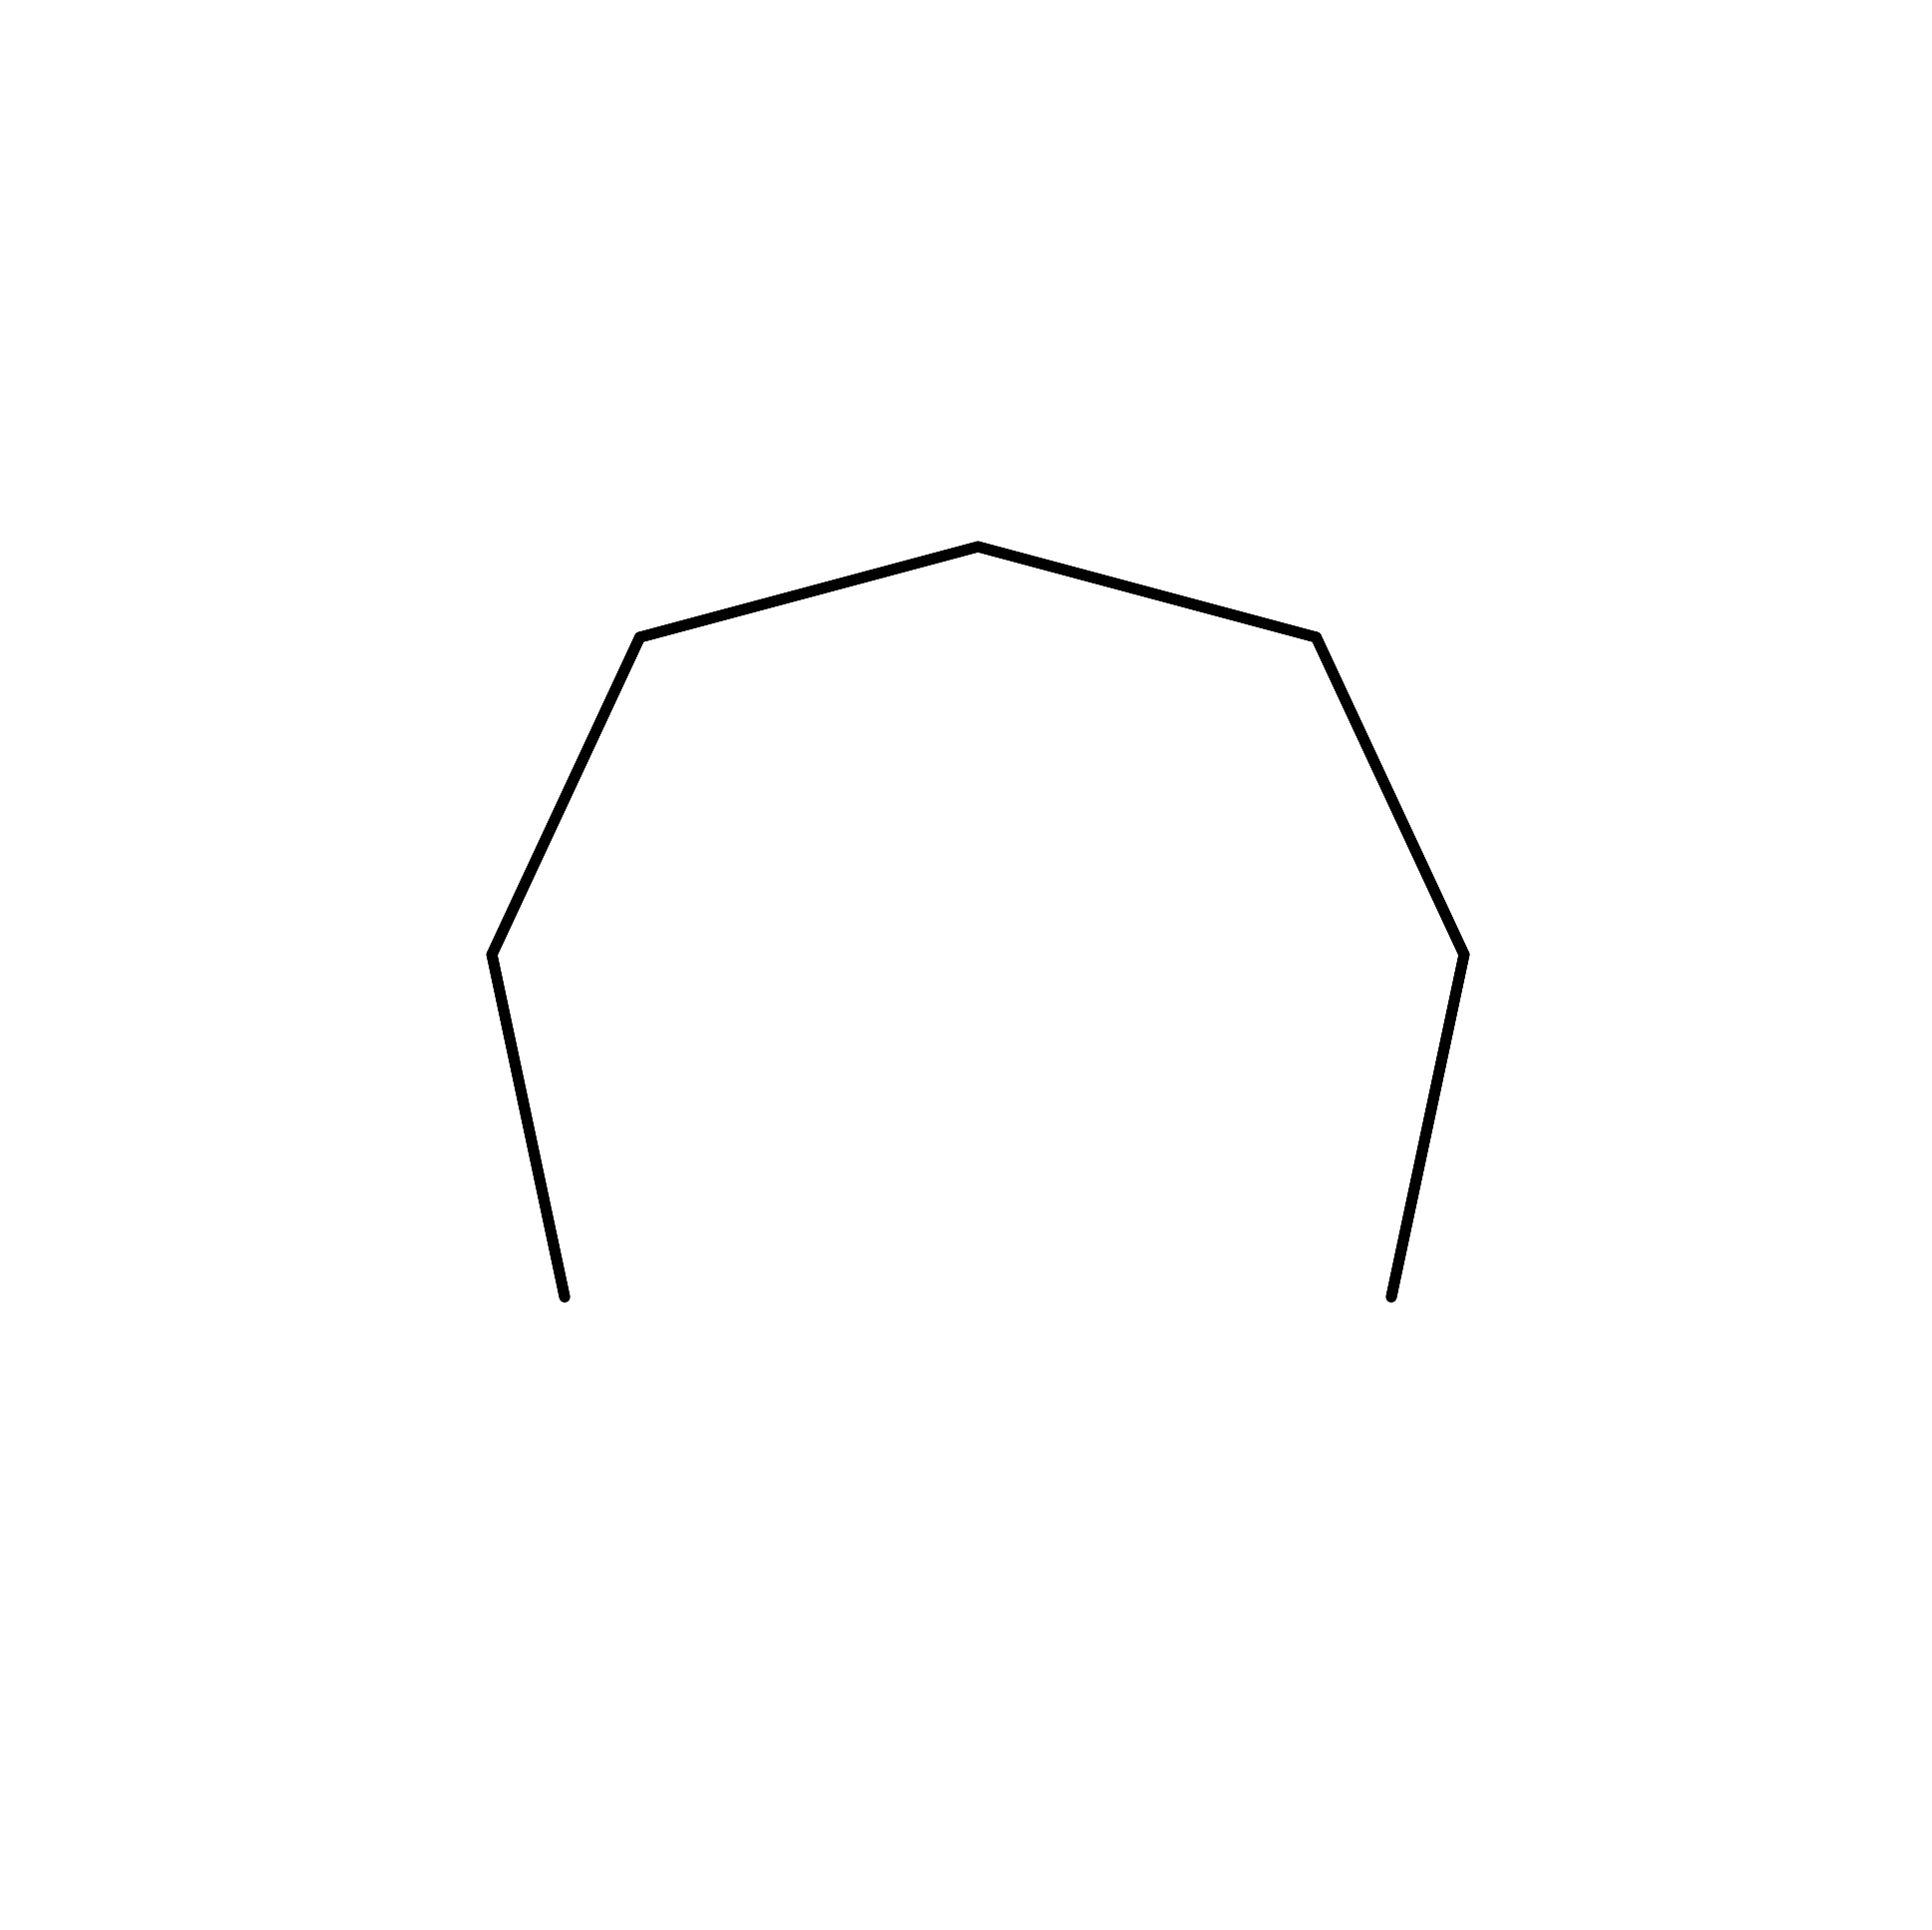

In [38]:
e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig = plt.figure(figsize=(e.figsize, e.figsize))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.axis('off')
ax.set_xlim([-e.total_width, e.total_width])
ax.set_ylim([-e.total_width, e.total_width])
scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[2,:])

In [39]:
fps = 10.
e.dt = 1./fps
opts = dict(vmin=0, vmax=1., linewidths=0, cmap=plt.cm.bone)
def make_frame_mpl(t):    
    #ax.clear()
    e.particles[2,:] = .5 + .5*np.sin(t*2*np.pi) 
    scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[2,:], **opts)
    return mplfig_to_npimage(fig) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
animation.ipython_display(fps=fps, loop=1, autoplay=1)

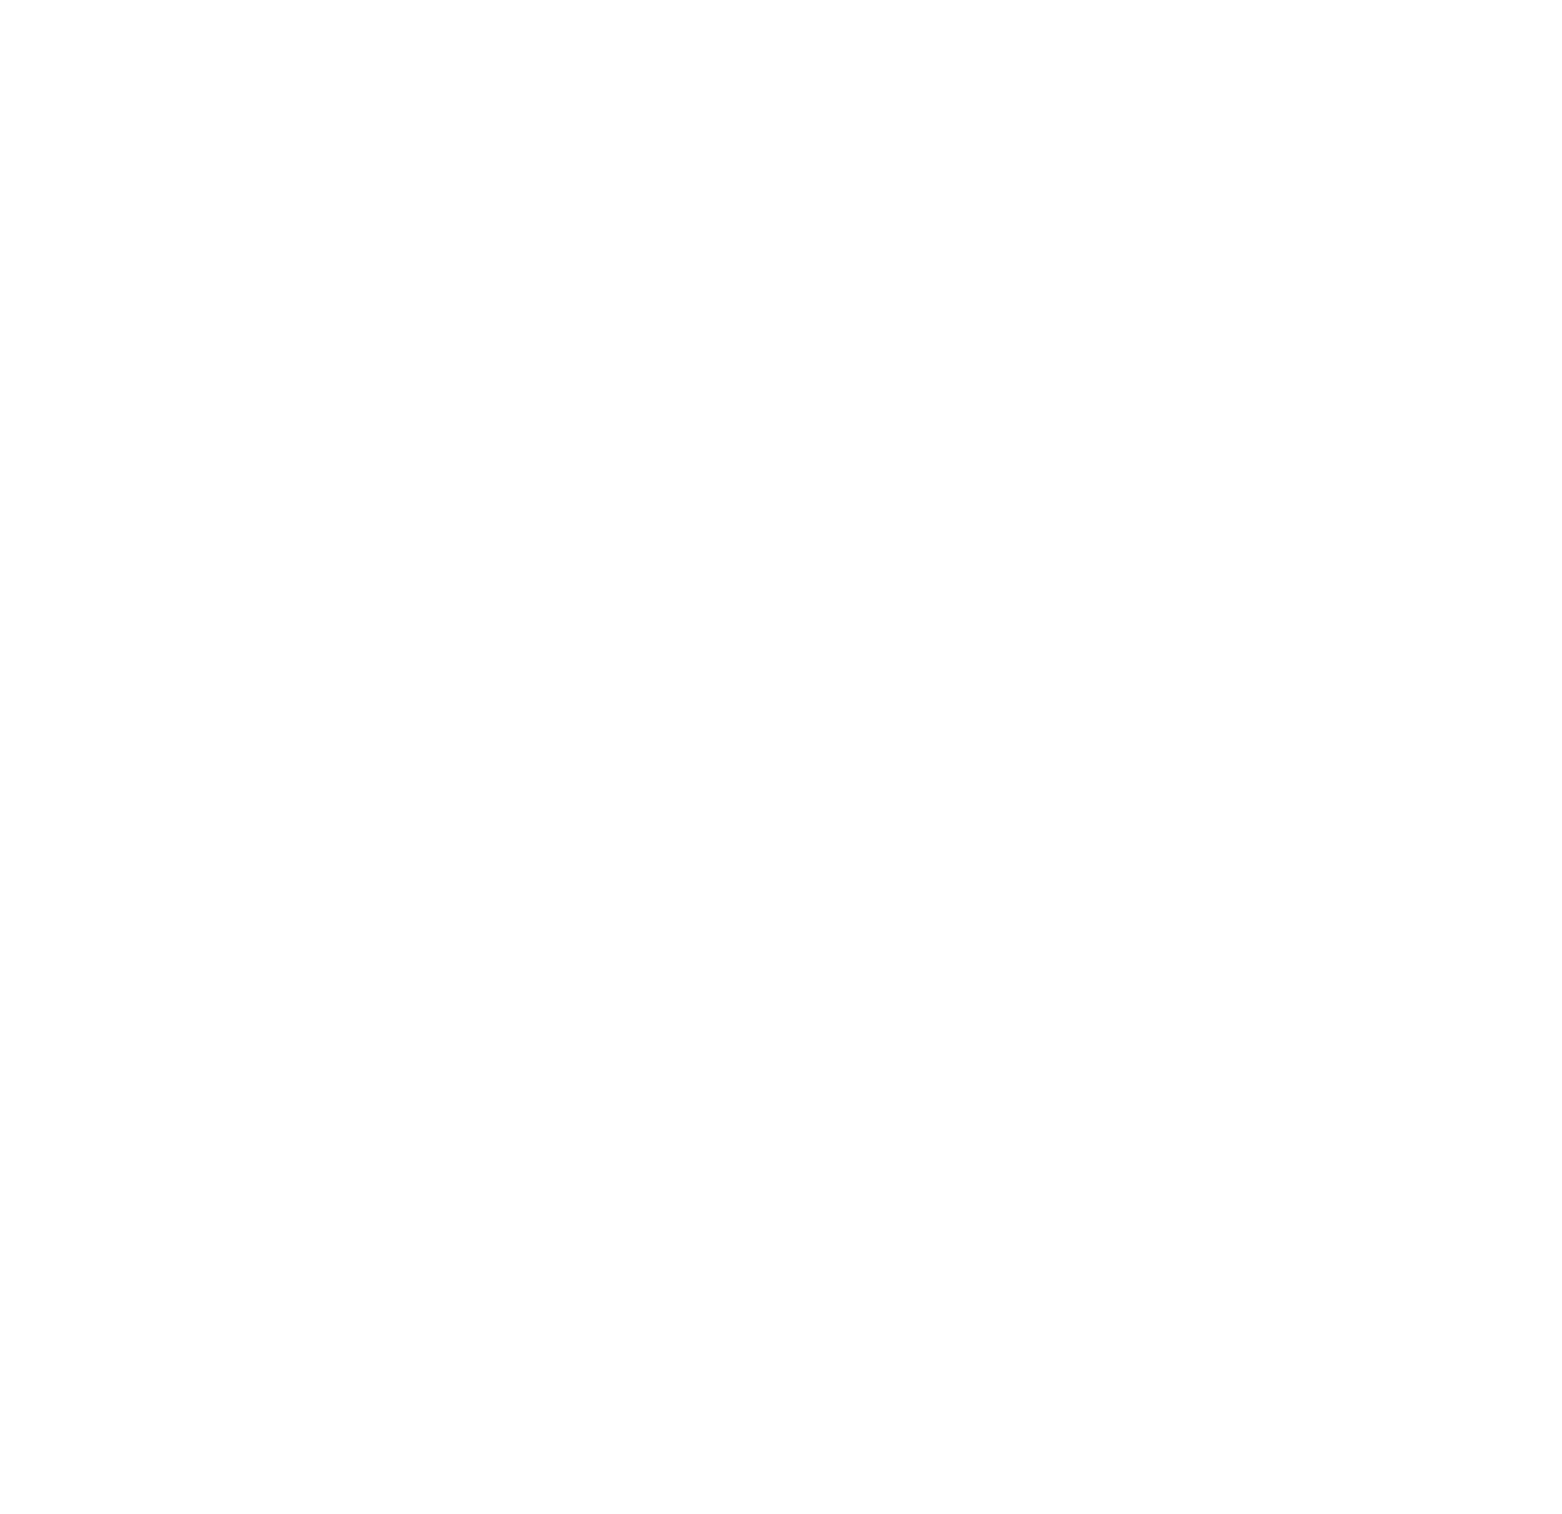

In [40]:
import elasticite as el
import numpy as np

class EdgeGrid(el.EdgeGrid):
    def update_particles(self):
        self.particles[2,:] =  .5 + .5*np.cos((self.t + np.linspace(0, 1., self.N_particles))*2*np.pi)

    def update(self):
        self.update_particles()

e = EdgeGrid(N_lame=25, grid_type='line')
fig, ax = plt.subplots(1, 1, figsize=(e.figsize, e.figsize))
ax.axis('off')
ax.set_xlim([-e.total_width, e.total_width])
ax.set_ylim([-e.total_width, e.total_width])

#ax = fig.add_axes((0, 0, 1, 1), axisbg='w')
fps = 10.
e.dt = 1./fps
opts = dict(vmin=0, vmax=1., linewidths=0, cmap=plt.cm.bone)
#print(opts)

In [41]:
def make_frame_mpl(t):    
    ax.clear()
    ax.axis('off')
    ax.set_xlim([-e.total_width, e.total_width])
    ax.set_ylim([-e.total_width, e.total_width])

    e.t = t
    e.update()
    scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[2,:], **opts)
    return mplfig_to_npimage(fig) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
animation.ipython_display(fps=fps, loop=1, autoplay=1)

All in one call:

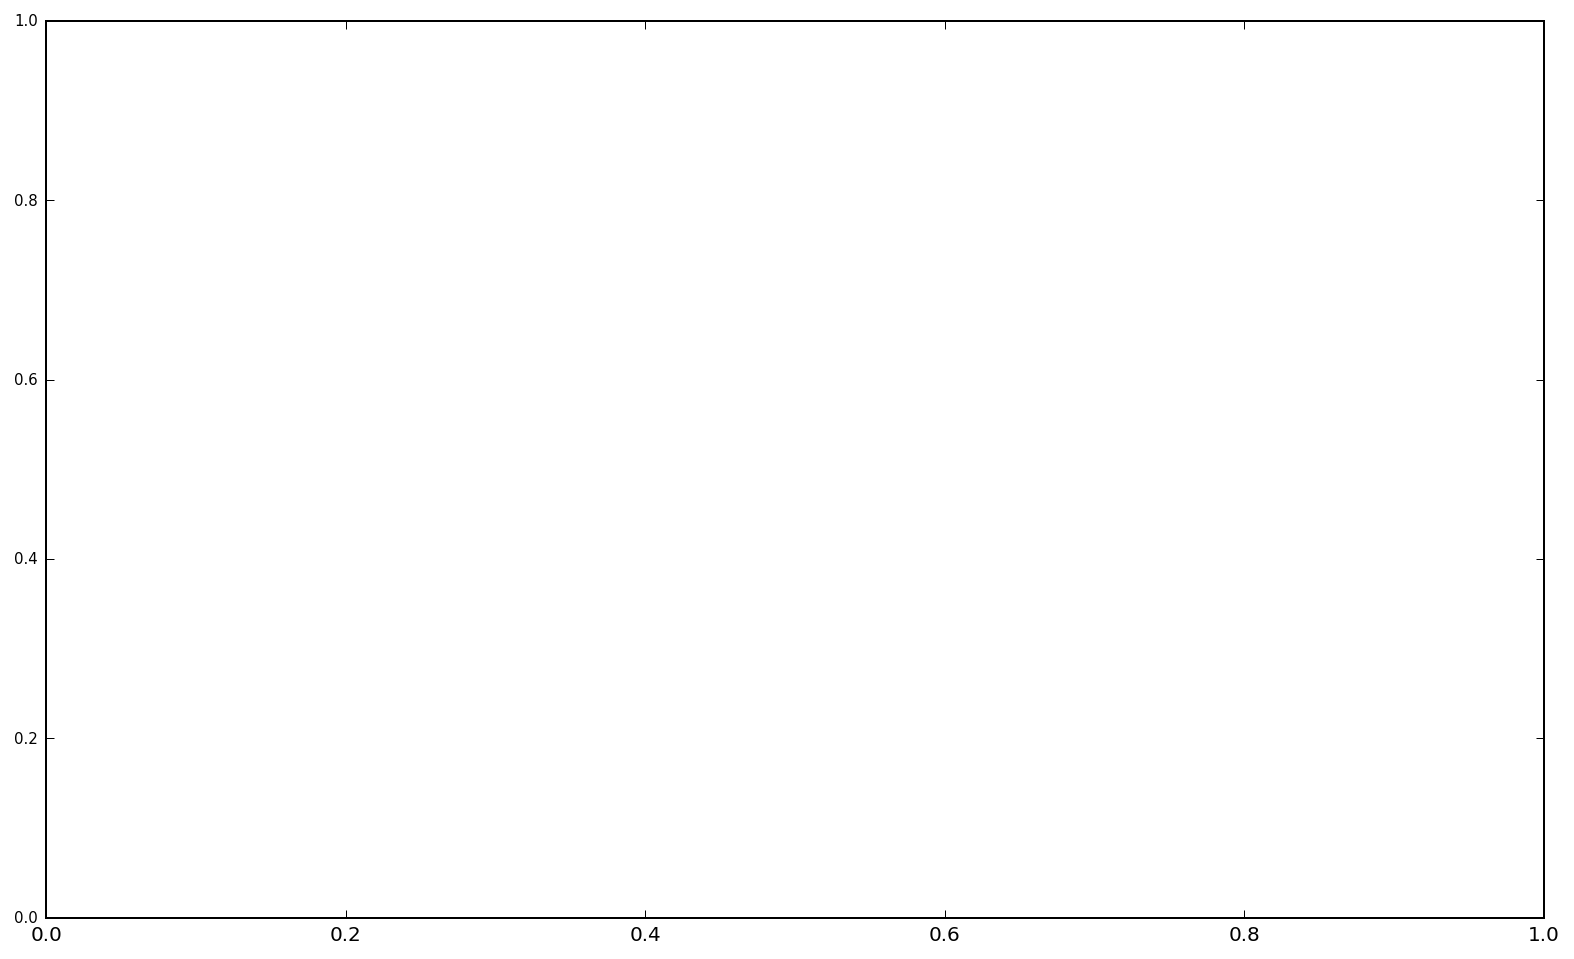

In [42]:
class EdgeGrid(el.EdgeGrid):
    def update_particles(self):
        self.particles[2,:] =  .5 + .5*np.cos((self.t + np.linspace(0, 1., self.N_particles))*2*np.pi)

    def update(self):
        self.update_particles()

e = EdgeGrid(N_lame=25, grid_type='line')
e.animate()

## git


In [43]:
!git s
#!git add 2015-10-27\ élasticité\ expansion.ipynb

 M "2015-11-02 \303\251lasticit\303\251 expansion en miroir.ipynb"
?? "../notes-Laurent/2015-10-22_\303\251lasticit\303\251 LAMES-Dynamique_pdf.pdf"
?? __temp__.mp4
?? __temp_ipython__.png
?? anim.gif
?? ../screenshot.png


In [44]:
!git commit -am' expansion - function de samples sur la structure - all in one call'

[master b516db9]  expansion - function de samples sur la structure - all in one call
 1 file changed, 436 insertions(+), 747 deletions(-)
 rewrite "posts/2015-11-02 \303\251lasticit\303\251 expansion en miroir.ipynb" (98%)


In [45]:
! git push



fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
